In [1]:
!wget https://www.dropbox.com/s/0is19o834tvmadx/Mobile%20Price%20Prediction%20Dataset%20%281%29.csv

--2020-11-02 09:55:01--  https://www.dropbox.com/s/0is19o834tvmadx/Mobile%20Price%20Prediction%20Dataset%20%281%29.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0is19o834tvmadx/Mobile%20Price%20Prediction%20Dataset%20%281%29.csv [following]
--2020-11-02 09:55:01--  https://www.dropbox.com/s/raw/0is19o834tvmadx/Mobile%20Price%20Prediction%20Dataset%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a586e1913878450b6416254f6.dl.dropboxusercontent.com/cd/0/inline/BCbnvtiKWkhheZeaes3xHUy8tqGNkvgTPNsuJTU_lBPkbq3HDLOLpLJ7BHDJQZ-437mBl3Shy1o11BtE2c7oUhXXilmRw_jtCslxDwTA53jCAny8E3aqfBRyhneK5II3pwM/file# [following]
--2020-11-02 09:55:02--  https://uc3a586e1913878450b6416254f6.dl.dropboxusercontent.com/cd/0/inli

In [2]:
import pandas as pd
df = pd.read_csv('/content/Mobile Price Prediction Dataset (1).csv')

In [3]:
print(df.shape)
df.head()

(8628, 40)


,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)/ 3(1800)/ 7(2600)/ 8(900)/ 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP/ autofocus,2 MP/ 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n/ Wi-Fi Direct/ hotspot,4.0/ A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM/...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP/ autofocus/ LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n/ Wi-Fi Direct/ hotspot,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)/ accelerometer/ pr...,Removable Li-Po 4080 mAh battery,Black/ White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM/...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP/ autofocus/ LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 2000 mAh battery,Black/ White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,NA,NaN,NaN,NaN,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac/ dual-band/ hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe/ Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP/ f/1.8/ autofocu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   brand               8628 non-null   object
 1   model               8628 non-null   object
 2   network_technology  8628 non-null   object
 3   2G_bands            8628 non-null   object
 4   3G_bands            4857 non-null   object
 5   4G_bands            1604 non-null   object
 6   network_speed       4884 non-null   object
 7   GPRS                8596 non-null   object
 8   EDGE                8605 non-null   object
 9   announced           8613 non-null   object
 10  status              8628 non-null   object
 11  dimentions          8609 non-null   object
 12  weight_g            7680 non-null   object
 13  weight_oz           7680 non-null   object
 14  SIM                 8626 non-null   object
 15  display_type        8624 non-null   object
 16  display_resolution  7414

The approx_price_EUR column should be a numeric column so lets convert it to int

In [5]:
print(df['approx_price_EUR'].unique())
print(df[df['approx_price_EUR']=='Black'])
df.drop(index=819,inplace=True)

['170' '250' '120' '230' nan '200' '110' '350' '220' '90' '150' '180'
 '190' '130' '80' '260' '240' '100' '340' '320' '160' '140' '380' '490'
 '70' '210' '270' '60' '440' '20' '50' '40' '30' '280' '460' '290' '360'
 '370' '620' '420' '450' '300' '470' '310' '900' '730' '390' '1500' '1450'
 '700' '650' '760' '690' '750' '850' '13000' '11000' '400' '540' '330'
 '500' '410' '800' '550' '510' 'Black' '1000' '430' '600' '530' '590' '10'
 '27000' '1150' '480' '880' '770' '570' '640' '660' '1400' '630' '580'
 '5400' '6099' '520' '560' '720' '1070' '840' '610' '11500' '830' '1470'
 '1200' '710' '670' '680' '9000' '5440' '8290' '5000' '7900' '2330' '6140'
 '5020' '5160' '5530' '2800' '3320' '5900']
    brand  ...                                            img_url
819  Asus  ...  http://cdn2.gsmarena.com/vv/bigpic/asus-google...

[1 rows x 40 columns]


In [7]:
df.isnull().sum()

brand                    0
model                    0
network_technology       0
2G_bands                 0
3G_bands              3771
4G_bands              7024
network_speed         3744
GPRS                    32
EDGE                    23
announced               15
status                   0
dimentions              19
weight_g               948
weight_oz              948
SIM                      1
display_type             4
display_resolution    1214
display_size            47
OS                    3723
CPU                   3793
Chipset               4937
GPU                   5135
memory_card              0
internal_memory       1821
RAM                   3971
primary_camera        1192
secondary_camera      1223
loud_speaker             0
audio_jack              67
WLAN                     4
bluetooth               18
GPS                     28
NFC                   7835
radio                   93
USB                    903
sensors               4040
battery                  2
c

Since our target column is approx_price_EUR, so the instances with null values in this column must be dropped

In [8]:
df.dropna(subset=['approx_price_EUR'],inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.isnull().sum()

(5003, 40)


brand                    0
model                    0
network_technology       0
2G_bands                 0
3G_bands              1504
4G_bands              3710
network_speed         1486
GPRS                     5
EDGE                    13
announced                3
status                   0
dimentions               3
weight_g               487
weight_oz              487
SIM                      1
display_type             2
display_resolution      79
display_size            12
OS                    1442
CPU                   1483
Chipset               2256
GPU                   2361
memory_card              0
internal_memory        513
RAM                   1648
primary_camera         280
secondary_camera       294
loud_speaker             0
audio_jack              27
WLAN                     3
bluetooth               15
GPS                     15
NFC                   4259
radio                   57
USB                     36
sensors               1604
battery                  0
c

In [9]:
df['approx_price_EUR'] = df['approx_price_EUR'].astype('int64')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


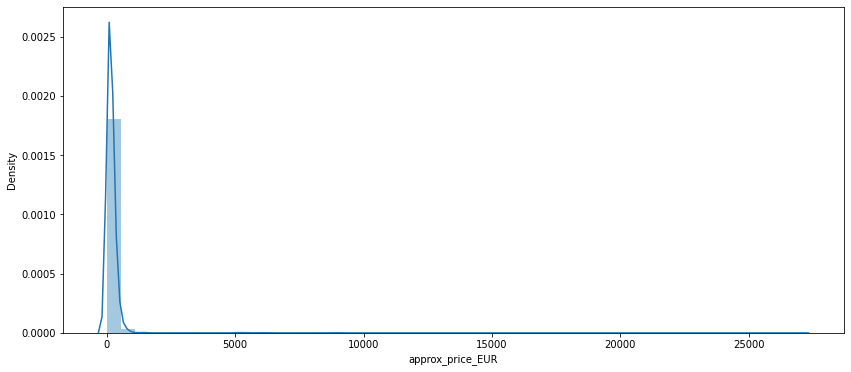

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.distplot(df['approx_price_EUR'])
plt.show()

It seems price feature has some outliers. Lets confirm it

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


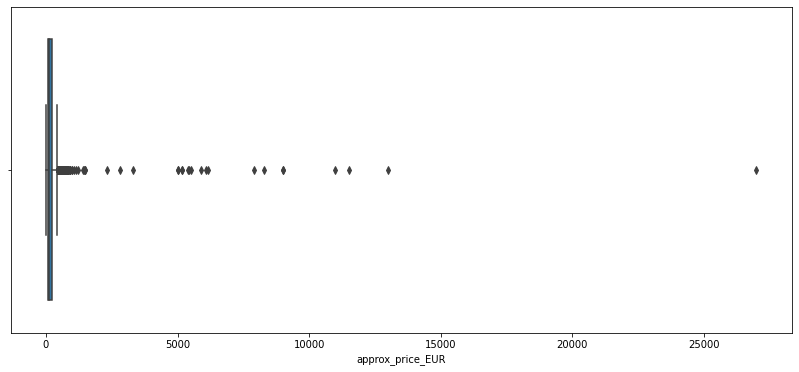

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(df['approx_price_EUR'])
plt.show()

In [12]:
len(df[df['approx_price_EUR']>1000])

28

These 28 data-points with price above 1000. They seem to be outlier, so lets remove them

In [13]:
df= df[df['approx_price_EUR']<1000]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


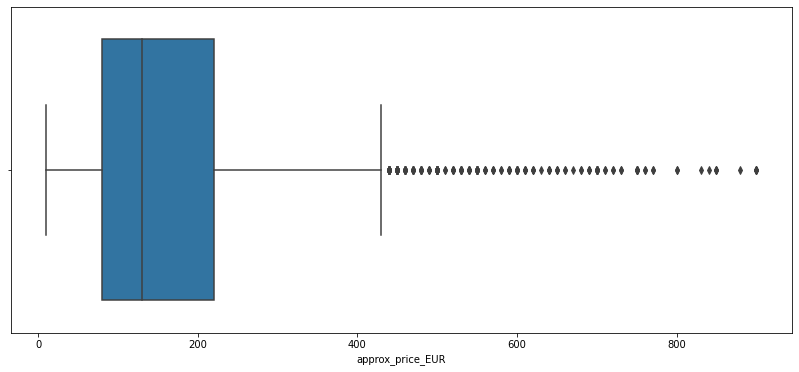

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(df['approx_price_EUR'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


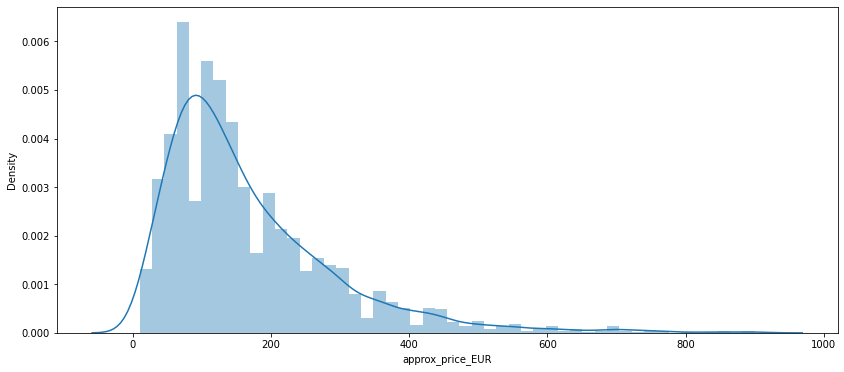

In [15]:
plt.figure(figsize=(14,6))
sns.distplot(df['approx_price_EUR'])
plt.show()

Now the data looks normally distributed

Lets use pandas profiling to understand the data

In [191]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [192]:
'''
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
profile.to_file("price_report.html")
'''

'\nfrom pandas_profiling import ProfileReport\n\nprofile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)\nprofile.to_file("price_report.html")\n'

From the report, we can see there are some duplicate values in column 'model', it can be possible that different brands have similar model name,lets see if that's the case 

In [16]:
df.duplicated(subset=['brand','model']).sum()

0

In [17]:
df[(df.duplicated(subset=['model'],keep=False)) & (df['model']=='One')]

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
1040,HTC,One,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 850 / 900 / 1900 / 2100,LTE band 3(1800)/ 7(2600)/ 20(800) - EMEA,HSPA LTE Cat3 100/50 Mbps,Yes,Yes,2013 February,Available. Released 2013 March,137.4 x 68.2 x 9.3 mm (5.41 x 2.69 x 0.37 in),143,5.04,Micro-SIM,Super LCD3 capacitive touchscreen 16M colors,4.7 inches (~65.0% screen-to-body ratio),1080 x 1920 pixels (~469 ppi pixel density),Android 4.1.2 (Jelly Bean)/ upgradable to 5.0 ...,Quad-core 1.7 GHz Krait 300,Qualcomm APQ8064T Snapdragon 600,Adreno 320,No,32/64 GB,2 GB RAM,4 MP/ f/2.0/ 28mm/ autofocus/ OIS/ LED flash/,2.1 MP/ 1080p@30fps/ HDR,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ac/ Wi-Fi Direct/ DLNA/ h...,4.0/ A2DP/ aptX,Yes with A-GPS GLONASS,Yes (Market dependent),Stereo FM radio/ RDS,microUSB 2.0 (MHL TV-out)/ USB Host,Accelerometer/ gyro/ proximity/ compass,Non-removable Li-Po 2300 mAh battery,Black/ Silver/ Red/ Blue/ Gold,270,http://cdn2.gsmarena.com/vv/bigpic/htc-one-m7-...
3089,OnePlus,One,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 850 / 900 / 1700 / 1900 / 2100,LTE band 1(2100)/ 3(1800)/ 4(1700/2100)/ 7(260...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2014 April,Available. Released 2014 June,152.9 x 75.9 x 8.9 mm (6.02 x 2.99 x 0.35 in),162,5.71,Micro-SIM,LTPS IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.9% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 4.4.2 (KitKat)/ upgradable to 6.0.1 (M...,Quad-core 2.5 GHz Krait 400,Qualcomm MSM8974AC Snapdragon 801,Adreno 330,No,16/64 GB,3 GB RAM,13 MP/ f/2.0/ autofocus/ dual-LED flash/,5 MP/ f/2.0/ 1080p@30fps,Yes dual mono speakers,Yes,Wi-Fi 802.11 a/b/g/n/ac/ Wi-Fi Direct/ DLNA/ h...,4.1/ A2DP,Yes with A-GPS GLONASS,Yes,No,microUSB 2.0/ USB Host,Accelerometer/ gyro/ proximity/ compass,Non-removable Li-Po 3100 mAh battery,Silk White/ Sandstone Black,250,http://cdn2.gsmarena.com/vv/bigpic/oneplus-one...
4830,XOLO,One,GSM / HSPA,GSM 900 / 1800 - SIM 1 & SIM 2,HSDPA 2100,NaN,HSPA 21.1/5.76 Mbps,Yes,Yes,2014 October,Available. Released 2014 October,128 x 64.3 x 9.3 mm (5.04 x 2.53 x 0.37 in),NaN,NaN,Dual SIM,IPS LCD capacitive touchscreen 256K colors,4.5 inches (~67.8% screen-to-body ratio),480 x 854 pixels (~218 ppi pixel density),Android 4.4.2 (KitKat)/ upgradable to 5.0 (Lol...,Quad-core 1.3 GHz Cortex-A7,Mediatek MT6582M,Mali-400MP2,microSD up to 32 GB,8 GB,1 GB RAM,5 MP/ LED flash,VGA,Yes,Yes,Wi-Fi 802.11 b/g/n/ hotspot,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 1700 mAh battery,Black/ White/ Brown/ Red/ Liverpool FC Limited...,80,http://cdn2.gsmarena.com/vv/bigpic/xolo-one.jpg


We can see our speculation was True

There is very high cardinality in the model column(98.6% of values are unique), so I think it would be safe to drop this column. 
* (In future, we can extract the names from the 'model' column like samsung galaxy series, note series, etc)



In [180]:
df1  = df.drop(columns=['colors','img_url'],axis=1)

In [181]:
import re
import numpy as np
df1['battery'] = df1['battery'].apply(lambda x: int(re.findall(r'\d+',x)[0]) if len(re.findall(r'\d{3}\d?',x))>0 else np.nan)
df1['battery'].head()

0    3400.0
1    4080.0
2    2000.0
3       NaN
4    4020.0
Name: battery, dtype: float64

In [182]:
print(df1['battery'].median())
df1['battery'].fillna(df1['battery'].median(),inplace=True)

1540.0


<Figure size 720x576 with 0 Axes>

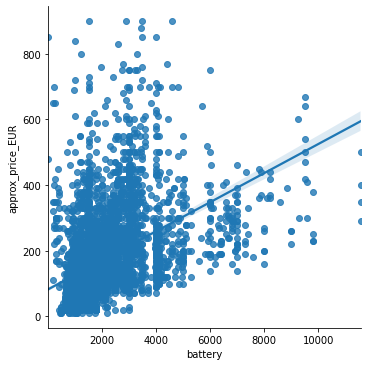

In [183]:

plt.figure(figsize=(10,8))
sns.lmplot(x='battery',y='approx_price_EUR',data=df1)

We can see there is some relationship between battery and approx_price_EUR

In [184]:
print(df1['battery'].value_counts(dropna=False).head())

1540.0    335
1500.0    315
1000.0    266
2000.0    249
3000.0    196
Name: battery, dtype: int64


In [185]:
df1.groupby('sensors')['approx_price_EUR'].mean().sort_values(ascending=False).head()

sensors
Fingerprint (front-mounted)/ accelerometer/ gyro/ proximity/ barometer/ compass                                     850.0
Iris scanner/ fingerprint (front-mounted)/ accelerometer/ gyro/ proximity/ compass/ barometer/ heart rate/ SpO2     805.0
Iris scanner/ fingerprint (rear-mounted)/ accelerometer/ gyro/ proximity/ compass/ barometer/ heart rate/ SpO2      800.0
Fingerprint (side-mounted/ region dependent)/ accelerometer/ gyro/ proximity/ barometer/ compass/ color spectrum    705.0
Iris scanner/ fingerprint (rear-mounted)/ accelerometer/ gyro/ proximity/ compass                                   700.0
Name: approx_price_EUR, dtype: float64

In [186]:
def split_censors(x):
  try:
    return x.split()[0].lower().strip('/')
  except:
    return np.nan

In [187]:
df1['sensors'] = df1['sensors'].apply(split_censors)

In [188]:
df1.groupby('sensors')['approx_price_EUR'].mean().sort_values(ascending=False)

sensors
iris             574.444444
fingerprint      360.794872
yes              227.272727
accelerometer    180.932290
ambient          170.000000
compass          126.000000
proximity         81.428571
gyro              50.000000
no                27.142857
Name: approx_price_EUR, dtype: float64

We can see phones having fingerprint and iris sensors are costlier

In [189]:
df1.sensors.value_counts(dropna=False)

accelerometer    2939
NaN              1596
fingerprint       390
proximity          14
yes                11
iris                9
no                  7
compass             5
ambient             1
gyro                1
Name: sensors, dtype: int64

In [190]:
def map_sensors(x):
  if x=='fingerprint' or x=='iris':
    return True
  else:
    return False

df1['have_fingerprint'] = df1['sensors'].apply(map_sensors)

In [191]:
df1['have_fingerprint'].value_counts(dropna=False)

False    4574
True      399
Name: have_fingerprint, dtype: int64

In [192]:
df1.drop('sensors',axis=1, inplace=True)

In [193]:
df1.groupby('have_fingerprint')['approx_price_EUR'].mean()

have_fingerprint
False    151.875820
True     365.614035
Name: approx_price_EUR, dtype: float64

In [194]:
df2 = df1.drop(columns='USB', axis=1)

In [195]:
df2.groupby('radio')['approx_price_EUR'].mean().sort_values(ascending=False).head()

radio
FM radio (market dependent)                       750.0
Stereo FM radio with RDS                          620.0
FM radio/ RDS (market dependent)                  560.0
FM radio (after SW update; operator dependent)    550.0
Stereo FM radio/ RDS - I605 & R950 models         350.0
Name: approx_price_EUR, dtype: float64

In column NFC 85% of the values are missing and most of the values are Yes. Most of the phones have radio available. Thus we can drop these columns 

In [196]:
df2.drop(columns=['radio','NFC'], axis=1,inplace=True)

In [197]:
#df2.GPS.unique()

In [198]:
def contains_gps(x):
  if x=='No' or x=='To be confirmed' or x=='Np':
    return False
  else:
    return True

df2['GPS'] = df2['GPS'].apply(contains_gps)

In [199]:
print(df2['GPS'].value_counts())
df2.groupby('GPS')['approx_price_EUR'].mean()

True     3337
False    1636
Name: GPS, dtype: int64


GPS
False     96.974328
True     204.348217
Name: approx_price_EUR, dtype: float64

In [200]:
#df2['bluetooth'].unique()

In [201]:
def map_bluetooth(x):
  try:
    if x=='No':
      return 0
    else:
      a = x.split('.')[0]
      try:
        return int(a)
      except:
        return 1
  except:
      return 1

df2['bluetooth'] = df2['bluetooth'].apply(map_bluetooth)

In [202]:
print(df2['bluetooth'].value_counts())
df2.groupby('bluetooth')['approx_price_EUR'].mean()

4    1932
2    1650
1     581
3     542
0     263
5       5
Name: bluetooth, dtype: int64


bluetooth
0     50.912548
1    116.041308
2    131.745455
3    154.833948
4    235.610766
5    650.000000
Name: approx_price_EUR, dtype: float64

In [203]:
#df2['WLAN'].unique()

In [204]:
def contains_wlan(x):
  if x=='No':
    return False
  else:
    return True

df2['WLAN'] = df2['WLAN'].apply(contains_wlan)

In [205]:
print(df2['WLAN'].value_counts())
df2.groupby('WLAN')['approx_price_EUR'].mean()

True     3530
False    1443
Name: WLAN, dtype: int64


WLAN
False     87.761608
True     202.243626
Name: approx_price_EUR, dtype: float64

In [206]:
def contains_audio_jack(x):
  if x=='No':
    return False
  else:
    return True

df2['audio_jack'] = df2['audio_jack'].apply(contains_audio_jack)

In [207]:
print(df2['audio_jack'].value_counts())
df2.groupby('audio_jack')['approx_price_EUR'].mean()

True     3692
False    1281
Name: audio_jack, dtype: int64


audio_jack
False    129.289617
True     182.811484
Name: approx_price_EUR, dtype: float64

In [208]:
df2.loud_speaker.unique()

array(['Yes', 'Yes with stereo speakers (4 speakers)',
       'Yes with stereo speakers', 'Yes dual speakers',
       'Yes built-in amplifier', 'Yes with quad speakers', 'No',
       'Yes with front stereo speakers', 'Yes with multiple speakers',
       'Yes with stereo speakers (1.5 Watt)',
       'Yes with stereo speakers (3G models only)',
       'Yes dual mono speakers',
       'Yes with stereo speakers (22 Khz with vibration)',
       'Yes with four speakers', 'Yes with dual speakers'], dtype=object)

In [209]:
def contains_loud_speaker(x):
  if x=='No':
    return False
  else:
    return True

df2['loud_speaker'] = df2['loud_speaker'].apply(contains_loud_speaker)

In [210]:
print(df2['loud_speaker'].value_counts())
df2.groupby('loud_speaker')['approx_price_EUR'].mean()

True     4844
False     129
Name: loud_speaker, dtype: int64


loud_speaker
False    130.775194
True     170.043353
Name: approx_price_EUR, dtype: float64

In [211]:
def map_camera(x):
  try:
    if x=='No':
      return 0
    else:
      a = x.split()[0]
      try:
        return int(a)
      except:
        try:
          return int(a.split('.')[0]) 
        except:
          return 1
  except:
      return np.nan

df2['secondary_camera'] = df2['secondary_camera'].apply(map_camera)

In [212]:
print(df2.secondary_camera.median())
df2['secondary_camera'].fillna(df2.secondary_camera.median(),inplace=True)
print(df2['secondary_camera'].value_counts().head())
df2.groupby('secondary_camera')['approx_price_EUR'].mean().head()

1.0
0.0    1769
1.0    1734
2.0     585
5.0     572
8.0     206
Name: secondary_camera, dtype: int64


secondary_camera
0.0    106.449972
1.0    161.095732
2.0    215.025641
3.0    303.076923
4.0    317.000000
Name: approx_price_EUR, dtype: float64

In [213]:
df2['primary_camera'] = df2['primary_camera'].apply(map_camera)

In [214]:
df2.primary_camera.median()

5.0

In [215]:
df2['primary_camera'].fillna(df2.primary_camera.median(),inplace=True)
print(df2['primary_camera'].value_counts().head())
df2.groupby('primary_camera')['approx_price_EUR'].mean().head()

5.0    1283
8.0     804
2.0     718
1.0     709
3.0     646
Name: primary_camera, dtype: int64


primary_camera
0.0    200.000000
1.0    107.404795
2.0    121.086351
3.0    134.597523
4.0    296.000000
Name: approx_price_EUR, dtype: float64

We can see some phones have high prices even though their primary camera is 0. This could be beacause there are some smart watches in the dataframe.

In [216]:
df2.drop(index=np.where(df2.primary_camera==600)[0][0],inplace=True)

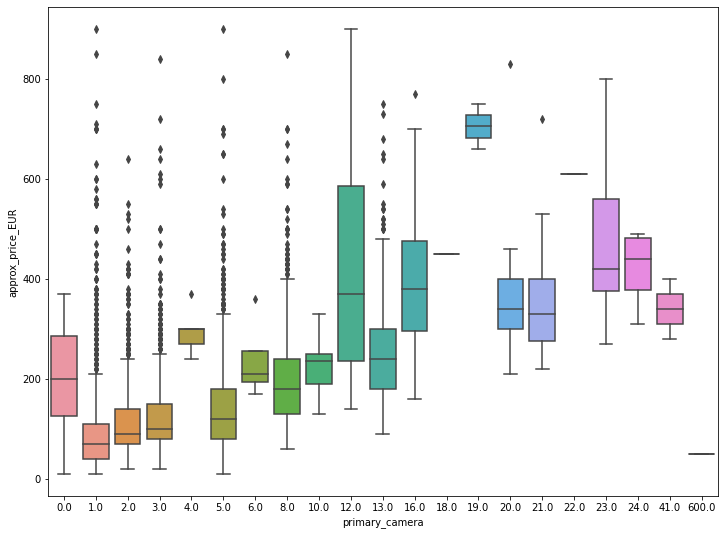

In [217]:
plt.figure(figsize=(12,9))
sns.boxplot(x='primary_camera',y='approx_price_EUR',data=df2)
plt.show()

We can see primary camera with value 12 have largest range in prices, also the median value of price is increasing as the camera quality is increasing


In [218]:
df2.RAM.value_counts().head()

1 GB RAM      1010
512 MB RAM     566
2 GB RAM       489
3 GB RAM       223
256 MB RAM     157
Name: RAM, dtype: int64

In [219]:
def map_ram(x):
  try:
    a=re.findall(r'[\d]+',x)[0]
    if len(a)>=2:
      return np.round(float(a)/1024,3)
    else:
      return float(a)
  except:
      return np.nan

df2['RAM'] = df2['RAM'].apply(map_ram)

In [220]:
df2['RAM'].median()

1.0

In [221]:
df2['RAM'].fillna(df2.RAM.median(),inplace=True)
print(df2['RAM'].value_counts().head())
df2.groupby('RAM')['approx_price_EUR'].mean().head()

1.00    2764
0.50     591
2.00     555
3.00     258
0.25     181
Name: RAM, dtype: int64


RAM
0.016     87.5000
0.023     20.0000
0.031     59.2000
0.049    160.0000
0.062    192.3125
Name: approx_price_EUR, dtype: float64

We can see mobile phones with 8gb RAM have very low prices, after checking the data I found out that they have 8mb RAM, thus lets manipulate them accordingly

In [222]:
df2['RAM'].iloc[np.where(df2.RAM==8)]=np.round(8/1024,3)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [223]:
#df2.internal_memory.unique()

In [224]:
def map_internal_memory(x):
  try:
    a=float(re.findall(r'[\d]*',x)[0])
    if re.search(r'GB',x):
      return a
    else:
      return np.round(a/1024,3)
  except:
      return np.nan

df2['internal_memory'] = df2['internal_memory'].apply(map_internal_memory)

In [225]:
df2.internal_memory.median()

4.0

In [226]:
df2['internal_memory'].fillna(df2.internal_memory.median(),inplace=True)
print(df2['internal_memory'].value_counts())
df2.groupby('internal_memory')['approx_price_EUR'].mean()

4.000     1178
16.000     882
8.000      688
32.000     331
0.500      204
          ... 
0.197        1
0.280        1
0.212        1
0.122        1
0.111        1
Name: internal_memory, Length: 156, dtype: int64


internal_memory
0.000       25.000000
0.001       43.714286
0.002       62.222222
0.003       74.705882
0.004       53.666667
              ...    
40.000     210.000000
64.000     462.380952
128.000    494.000000
256.000    340.000000
512.000     40.000000
Name: approx_price_EUR, Length: 156, dtype: float64

In [227]:
df2.loc[df2.internal_memory==512,'internal_memory']=0.5

In [228]:
def map_memory_card(x):
  if x=='No':
    return 0
  else:
    try:
      a=float(re.search(r'\d+',x).group(0))
      if re.search(r'GB',x):
        return a
      else:
        return np.round(a/1024,3)
    except:
      return np.nan

df2['memory_card'] = df2['memory_card'].apply(map_memory_card)

In [229]:
df2.memory_card.median()

32.0

In [230]:
df2['memory_card'].fillna(df2.memory_card.median(),inplace=True)
print(df2['memory_card'].value_counts(dropna=False).head())
df2.groupby('memory_card')['approx_price_EUR'].mean().head()

32.0     2300
0.0       703
256.0     583
64.0      332
16.0      326
Name: memory_card, dtype: int64


memory_card
0.000    201.009957
0.002    165.000000
0.031    100.000000
0.062    202.857143
0.125    185.000000
Name: approx_price_EUR, dtype: float64

In [231]:
def map_GPU(x):
  try:
    if len(x)>0:
      return True
  except:
    return False
    

In [232]:
df2['GPU'] = df2['GPU'].apply(map_GPU)
print(df2['GPU'].value_counts())
df2.groupby('GPU')['approx_price_EUR'].mean()

True     2629
False    2343
Name: GPU, dtype: int64


GPU
False    114.157064
True     217.930772
Name: approx_price_EUR, dtype: float64

In [233]:
df2.groupby('Chipset')['approx_price_EUR'].mean().sort_values(ascending=False)

Chipset
Apple A10 Fusion                    830.0
Apple A10X Fusion                   815.0
Exynos 8895 Octa - EMEA             800.0
Apple A9X                           770.0
Hisilicon Kirin 960                 740.0
                                    ...  
Mediatek MT6255                      40.0
Mediatek MT6223D                     30.0
Spreadtrum 6821                      30.0
Mediatek MT6250M                     20.0
Qualcomm MSM7225-1 Snapdragon S1     10.0
Name: approx_price_EUR, Length: 466, dtype: float64

In [234]:
def map_chipset(x):
  try:
    return x.split()[0] 
  except:
    return 0

df2['Chipset'] = df2['Chipset'].apply(map_chipset)

In [235]:
df2.groupby('Chipset')['approx_price_EUR'].mean().sort_values(ascending=False).head()

Chipset
ATI          660.000000
Intel®       480.000000
Apple        457.272727
Hisilicon    444.444444
Exynos       355.876289
Name: approx_price_EUR, dtype: float64

In [236]:
#df2.CPU.unique()

In [237]:
def map_cpu(x):
  try:
    return re.search('Quad|Dual|Octa|Hexa',x).group(0)
  except:
    return 'other'

df2['CPU'] = df2['CPU'].apply(map_cpu)

In [238]:
df2.groupby('CPU')['approx_price_EUR'].mean().sort_values(ascending=False)

CPU
Octa     302.224409
Hexa     300.000000
Quad     212.757754
Dual     191.009818
other    114.093244
Name: approx_price_EUR, dtype: float64

In [239]:
#df2.groupby('OS')['approx_price_EUR'].mean().sort_values(ascending=False).head(40)

In [240]:
def map_os(x):
  try:
    a=x.split()
    if a[0]=='Android':
      return a[-1]
    else:
      return a[0]
  except:
    return 'other'

df2['OS'] = df2['OS'].apply(map_os)

In [241]:
df2.groupby('OS')['approx_price_EUR'].mean().sort_values(ascending=False).head()

OS
T815        520.000000
watchOS     499.000000
T715        440.000000
iOS         435.428571
(Nougat)    360.955056
Name: approx_price_EUR, dtype: float64

In [242]:
#df.display_size.unique()

In [243]:
def map_display_res(x):
  try:
    return int(re.search(r'~\d+',x).group(0).strip('~'))
  except:
    return np.nan

df2['display_res'] = df2['display_size'].map(map_display_res)

In [244]:
df2['display_res'].median()

210.0

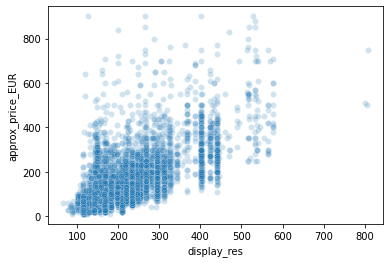

In [245]:
df2['display_res'].fillna(df2['display_res'].median(),inplace=True)
sns.scatterplot(x='display_res',y='approx_price_EUR', data =df2,alpha=0.2)

We can see as the 'display_res' is increasing, price is also increasing 

In [246]:
df2['display_resolution'].unique()[-10:]

array(['4.7 inches (~68.6% screen-to-body ratio)',
       '6.44 inches (~71.6% screen-to-body ratio)',
       '5.7 inches (~67.8% screen-to-body ratio)',
       '3.5 inches (~49.4% screen-to-body ratio)',
       '3.5 inches (~51.0% screen-to-body ratio)',
       '3.2 inches (~41.1% screen-to-body ratio)',
       '4.0 inches (~60.1% screen-to-body ratio)',
       '7.0 inches (~61.7% screen-to-body ratio)',
       '7.0 inches (~56.0% screen-to-body ratio)',
       '3.5 inches (~53.0% screen-to-body ratio)'], dtype=object)

In [247]:
def map_display_size(x):
  try:
    return float(x.split()[0])
  except:
    return np.nan

df2['display_size'] = df2['display_resolution'].apply(map_display_size)

In [248]:
df2['display_size'].median()

4.0

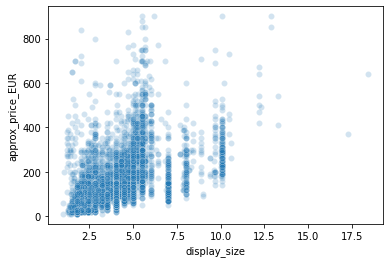

In [249]:
df2['display_size'].fillna(df2['display_size'].median(),inplace=True)
sns.scatterplot(x='display_size',y='approx_price_EUR', data =df2,alpha=0.2)

We can see as the 'display_size' is increasing the price is also increasing.
We can also use this graph to remove smart watches, using
df2=df2[~((df2['display_size']<3) & (df2['approx_price_EUR']>400))]

But lets leave it for now

In [250]:
def map_screen_to_body(x):
  try:
    return float(re.search(r'~\d+\.?\d+',x).group(0).strip('~'))
  except:
    return np.nan

df2['screen_to_body_ratio'] = df2['display_resolution'].apply(map_screen_to_body)

In [251]:
df2['screen_to_body_ratio'].median()

57.2

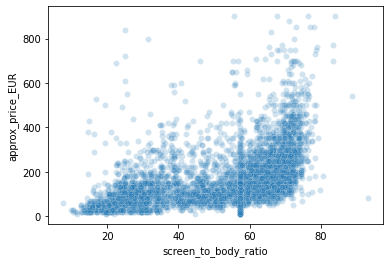

In [252]:
df2['screen_to_body_ratio'].fillna(df2['screen_to_body_ratio'].median(),inplace=True)
sns.scatterplot(x='screen_to_body_ratio',y='approx_price_EUR', data =df2,alpha=0.2)

We can see as the screen to body ratio gets above 70% the price is rapidly increasing

In [253]:
df2.drop(columns='display_resolution',axis=1,inplace=True)

In [254]:
#df2['display_type'].unique()

In [255]:
def map_display_type(x):
  try:
    a = re.search(r'\d+[K|M]',x).group(0)
    if re.search('M',a):
      return int(re.search('\d+',a).group(0))*100
    else:
      return int(re.search('\d+',a).group(0))
  except:
    return np.nan

In [256]:
df2['display_type'] = df2['display_type'].apply(map_display_type)

In [257]:
df2['display_type'].median()

1600.0

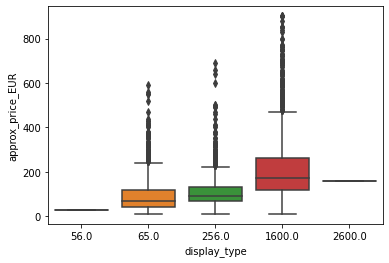

In [258]:
df2['display_type'].fillna(df2['display_type'].median(),inplace=True)
sns.boxplot(x='display_type',y='approx_price_EUR', data =df2)

We have mapped the number of colors(in K) in the display_type. We can see the price is increasing

Since weight_oz and weight_g contains same info, we can drop weight_oz

In [259]:
df2.drop(['SIM','weight_oz'],axis=1,inplace=True)

In [260]:
df2['weight_g']=df2['weight_g'].astype('float')
df2['weight_g'].fillna(df2['weight_g'].median(),inplace=True)

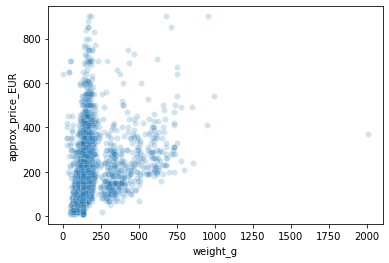

In [261]:
sns.scatterplot(x='weight_g',y='approx_price_EUR', data =df2,alpha=0.2)

We can't see actual relation over here, as the weight_g depends on the size, but we can see there are large number of phones with high prices below 250g

In [262]:
def map_width(x):
  try:
    return float(x.split('x')[2].split()[0].strip())
  except:
    return np.nan

df2['width'] = df2['dimentions'].apply(map_width)

In [263]:
df2['width'].median()

11.2

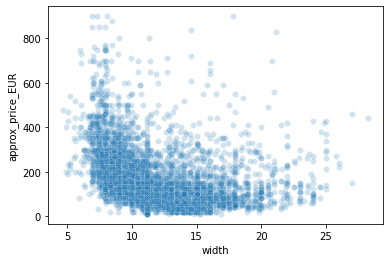

In [264]:
df2['width'].fillna(df2['width'].median(),inplace=True)
sns.scatterplot(x='width',y='approx_price_EUR', data =df2,alpha=0.2)

We can see as the width is decreasing, the price is increasing

In [265]:
def map_diag_length(x):
  try:
    l,b=float(x.split('x')[0].strip()), float(x.split('x')[1].strip())
    return np.round(np.sqrt(l**2 + b**2),2)
  except:
    return np.nan

In [266]:
df2['diag_len'] = df2['dimentions'].apply(map_diag_length)
df2['diag_len'].isnull().sum()

191

137.58


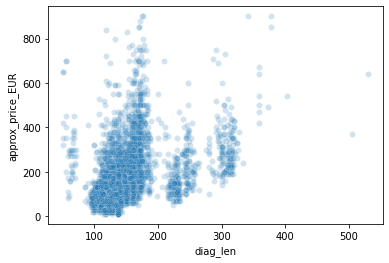

In [267]:
print(df2['diag_len'].median())
df2['diag_len'].fillna(df2['diag_len'].median(),inplace=True)
sns.scatterplot(x='diag_len',y='approx_price_EUR', data =df2,alpha=0.2)

In [268]:
df2.drop(columns='dimentions',axis=1,inplace=True)

In [269]:
#df2.status.unique()

In [270]:
def map_release(x):
  try:
    return int(re.search('\d{4}',x).group(0))
  except:
    return np.nan

In [271]:
df2['release_date'] = df2['status'].apply(map_release)
df2['release_date'].isnull().sum()

1788

In [272]:
df2['status'] = df2['status'].apply(lambda x: x.split()[0].strip('.'))

In [273]:
df2['status'].value_counts(dropna=False)

Available       3286
Discontinued    1641
Cancelled         23
Coming            22
Name: status, dtype: int64

In [274]:
def map_announced(x):
  try:
    return int(re.search('\d{4}',x).group(0).strip('.'))
  except:
    return np.nan
df2['announced'] = df2['announced'].apply(map_announced)
df2['announced'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009., 2017.,
       2008., 2007.,   nan, 2006., 2003., 2005., 2004.])

In [275]:
df2['announced'].isnull().sum()

4

In [276]:
df2[['announced','release_date']]

,announced,release_date
0,2016.0,2016.0
1,2016.0,2016.0
2,2016.0,2016.0
3,2016.0,2016.0
4,2015.0,2016.0
...,...,...
4998,2011.0,2011.0
4999,2011.0,2011.0
5000,2010.0,NaN
5001,2010.0,NaN


Lets fill the null values in released_date column with the year those phones were announced

In [277]:
df2.loc[df2['release_date'].isnull(),'release_date'] = df2.loc[df2['release_date'].isnull(),'announced']

In [278]:
df2['release_date'].isnull().sum()

4

4 null values present in both 'release_date' and 'announced'

In [279]:
df2.dropna(subset=['release_date'],inplace=True)

In [280]:
df2.drop(columns='announced',axis=1,inplace=True)

In [281]:
def map_edge(x):
  if x=='No':
    return False
  else:
    return True

df2['EDGE'] = df2['EDGE'].apply(map_edge)

In [282]:
df2.EDGE.value_counts()

True     3921
False    1047
Name: EDGE, dtype: int64

In [283]:
df2.groupby('EDGE')['approx_price_EUR'].mean()

EDGE
False    115.682904
True     183.210916
Name: approx_price_EUR, dtype: float64

In [284]:
def map_gprs(x):
  if x=='No':
    return False
  else:
    return True

df2['GPRS'] = df2['GPRS'].apply(map_gprs)

In [285]:
df2.GPRS.value_counts()

True     4417
False     551
Name: GPRS, dtype: int64

In [286]:
df2.groupby('GPRS')['approx_price_EUR'].mean()

GPRS
False    149.092559
True     171.460267
Name: approx_price_EUR, dtype: float64

In [287]:
df2.drop(columns=['network_technology','network_speed'],axis=1,inplace=True)

In [288]:
#df2['2G_bands'].unique()

In [289]:
def map_bands(x):
  try:
    if len(x)>1 or x!=' NA':
      return True
    else:
      return False
  except:
    return False

In [290]:
df2['3G_bands']= df2['3G_bands'].apply(map_bands)
df2['4G_bands']= df2['4G_bands'].apply(map_bands)

In [291]:
df2.drop(columns=['model','2G_bands'],axis=1, inplace=True)

In [292]:
df2.head()

,brand,3G_bands,4G_bands,GPRS,EDGE,status,weight_g,display_type,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,battery,approx_price_EUR,have_fingerprint,display_res,screen_to_body_ratio,width,diag_len,release_date
0,Acer,True,True,True,True,Available,260.0,1600.0,7.0,(Marshmallow),Quad,Mediatek,True,128.0,16.0,2.0,13.0,2.0,True,True,True,4,True,3400.0,170,False,210.0,69.8,9.4,216.68,2016.0
1,Acer,True,True,True,True,Available,169.0,1600.0,5.5,(Marshmallow),Octa,Mediatek,True,256.0,32.0,3.0,13.0,5.0,True,True,True,4,True,4080.0,250,True,401.0,71.7,8.5,171.38,2016.0
2,Acer,True,True,True,True,Available,130.0,1600.0,5.0,(Marshmallow),Quad,Mediatek,True,256.0,8.0,1.0,8.0,2.0,True,True,True,1,True,2000.0,120,False,294.0,57.2,11.2,137.58,2016.0
3,Acer,False,False,False,False,Available,130.0,1600.0,10.1,(Marshmallow),Quad,Mediatek,True,256.0,16.0,2.0,5.0,2.0,True,True,True,1,True,1540.0,230,False,224.0,68.4,8.9,308.17,2016.0
4,Acer,True,True,True,True,Available,166.0,1600.0,5.5,(Lollipop),Octa,Mediatek,True,32.0,32.0,3.0,13.0,13.0,True,True,True,4,True,4020.0,230,False,267.0,69.0,8.5,172.37,2016.0


In [293]:
#df2.info()
df2.describe(include=['object','bool'])

,brand,3G_bands,4G_bands,GPRS,EDGE,status,OS,CPU,Chipset,GPU,loud_speaker,audio_jack,WLAN,GPS,have_fingerprint
count,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968,4968
unique,76,2,2,2,2,4,59,5,37,2,2,2,2,2,2
top,Samsung,True,False,True,True,Available,other,other,0,True,True,True,True,True,False
freq,869,3477,3686,4417,3921,3285,1430,2528,2238,2628,4840,3689,3527,3335,4570


In [294]:
df2.describe()

,weight_g,display_type,display_size,memory_card,internal_memory,RAM,primary_camera,secondary_camera,bluetooth,battery,approx_price_EUR,display_res,screen_to_body_ratio,width,diag_len,release_date
count,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000,4968.000000
mean,152.544636,1078.132448,4.085994,51.730621,8.792986,1.160676,5.804549,1.730072,2.666465,1964.602456,168.979469,228.121981,51.331019,11.823450,147.580860,2011.869968
std,104.954789,686.332115,1.926852,77.267291,13.495268,0.868932,9.544880,2.584471,1.247533,1302.471127,125.931461,93.634174,17.691894,3.557855,43.802698,3.019432
min,2.650000,56.000000,1.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,10.000000,10.000000,66.000000,7.600000,4.700000,50.980000,2003.000000
25%,105.000000,256.000000,2.400000,8.000000,0.250000,1.000000,2.000000,0.000000,2.000000,1050.000000,80.000000,163.000000,34.300000,9.000000,120.740000,2010.000000
50%,130.000000,1600.000000,4.000000,32.000000,4.000000,1.000000,5.000000,1.000000,2.000000,1540.000000,130.000000,210.000000,57.200000,11.200000,137.580000,2012.000000
75%,154.000000,1600.000000,5.000000,32.000000,16.000000,1.000000,8.000000,2.000000,4.000000,2440.000000,220.000000,275.000000,66.325000,13.900000,160.560000,2014.000000
max,2005.000000,2600.000000,18.400000,512.000000,256.000000,6.000000,600.000000,20.000000,5.000000,11560.000000,900.000000,807.000000,93.200000,28.200000,529.330000,2017.000000


The mininmum weight is too less and seems to be an outlier. Lets inspect and remove it

In [295]:
df2[df2['weight_g']<20]

,brand,3G_bands,4G_bands,GPRS,EDGE,status,weight_g,display_type,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,battery,approx_price_EUR,have_fingerprint,display_res,screen_to_body_ratio,width,diag_len,release_date
3429,Samsung,True,True,True,True,Available,2.65,1600.0,18.4,(Lollipop),Octa,Exynos,True,256.0,32.0,2.0,2.0,0.0,True,True,True,4,True,5700.0,640,False,120.0,74.9,11.9,529.33,2015.0


In [296]:
df2=df2[df2['weight_g']>20]

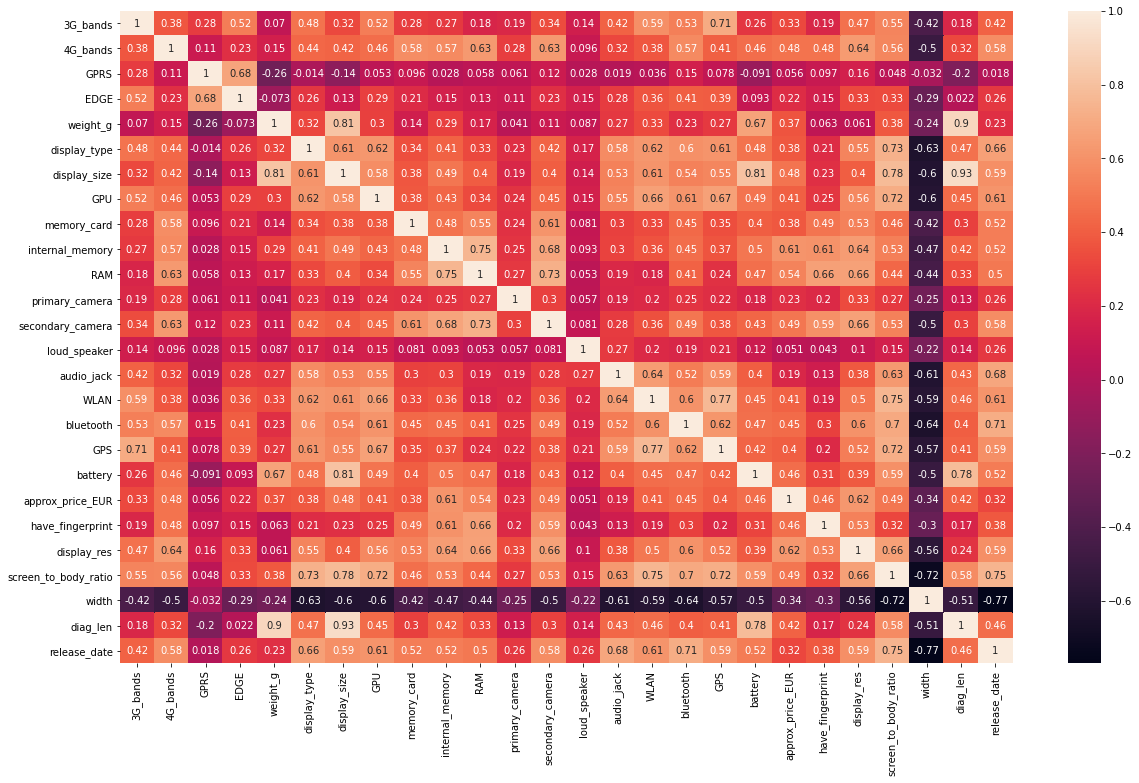

In [297]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(),annot=True)
plt.show()

Most of the features are showing good correlation with price column

In [298]:
df2.rename(columns={'3G_bands':'bands_3G','4G_bands':'bands_4G'},inplace=True)

Lets convert the categorical feature to one-hot encoded vector

In [299]:

dummies = pd.get_dummies(df2[['brand','status','OS','CPU','Chipset']],drop_first=True)
print(dummies.shape)
dummies.head()

(4967, 176)


,brand_Allview,brand_Amazon,brand_Apple,brand_Archos,brand_Asus,brand_BLU,brand_BQ,brand_BenQ,brand_BlackBerry,brand_Casio,brand_Cat,brand_Celkon,brand_Coolpad,brand_Dell,brand_Eten,brand_Garmin-Asus,brand_Gigabyte,brand_Gionee,brand_Google,brand_HP,brand_HTC,brand_Huawei,brand_Icemobile,brand_Intex,brand_Jolla,brand_Karbonn,brand_Kyocera,brand_LG,brand_Lava,brand_LeEco,brand_Lenovo,brand_Meizu,brand_Micromax,brand_Microsoft,brand_Mitac,brand_Motorola,brand_NEC,brand_NIU,brand_Neonode,brand_Nokia,...,CPU_Hexa,CPU_Octa,CPU_Quad,CPU_other,Chipset_ATI,Chipset_Allwinner,Chipset_Apple,Chipset_BCM,Chipset_BCM21553,Chipset_BCM23550,Chipset_Broadcom,Chipset_Exynos,Chipset_HiSilicon,Chipset_Hisilicon,Chipset_Huawei,Chipset_Hummingbird,Chipset_Intel,Chipset_Intel®,Chipset_LG,Chipset_Leadcore,Chipset_MSM7626A,Chipset_Marvell,Chipset_MediaTek,Chipset_Mediatek,Chipset_NVIDIA,Chipset_NovaThor,Chipset_Nvidia,Chipset_Pega-Dual,Chipset_Qualcomm,Chipset_Rochip,Chipset_Rockchip,Chipset_SC6815A,Chipset_ST,Chipset_STM,Chipset_Snapdragon,Chipset_Spreadtrum,Chipset_TI,Chipset_VIA,Chipset_Vivante,Chipset_Xiaomi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
df3 = pd.concat([df2,dummies],axis=1)
df3.drop(columns=['brand','status','OS','CPU','Chipset'],axis=1,inplace=True)
print(df3.shape)
df3.head()

(4967, 202)


,bands_3G,bands_4G,GPRS,EDGE,weight_g,display_type,display_size,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,battery,approx_price_EUR,have_fingerprint,display_res,screen_to_body_ratio,width,diag_len,release_date,brand_Allview,brand_Amazon,brand_Apple,brand_Archos,brand_Asus,brand_BLU,brand_BQ,brand_BenQ,brand_BlackBerry,brand_Casio,brand_Cat,brand_Celkon,brand_Coolpad,brand_Dell,...,CPU_Hexa,CPU_Octa,CPU_Quad,CPU_other,Chipset_ATI,Chipset_Allwinner,Chipset_Apple,Chipset_BCM,Chipset_BCM21553,Chipset_BCM23550,Chipset_Broadcom,Chipset_Exynos,Chipset_HiSilicon,Chipset_Hisilicon,Chipset_Huawei,Chipset_Hummingbird,Chipset_Intel,Chipset_Intel®,Chipset_LG,Chipset_Leadcore,Chipset_MSM7626A,Chipset_Marvell,Chipset_MediaTek,Chipset_Mediatek,Chipset_NVIDIA,Chipset_NovaThor,Chipset_Nvidia,Chipset_Pega-Dual,Chipset_Qualcomm,Chipset_Rochip,Chipset_Rockchip,Chipset_SC6815A,Chipset_ST,Chipset_STM,Chipset_Snapdragon,Chipset_Spreadtrum,Chipset_TI,Chipset_VIA,Chipset_Vivante,Chipset_Xiaomi
0,True,True,True,True,260.0,1600.0,7.0,True,128.0,16.0,2.0,13.0,2.0,True,True,True,4,True,3400.0,170,False,210.0,69.8,9.4,216.68,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,True,True,True,True,169.0,1600.0,5.5,True,256.0,32.0,3.0,13.0,5.0,True,True,True,4,True,4080.0,250,True,401.0,71.7,8.5,171.38,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,True,True,True,True,130.0,1600.0,5.0,True,256.0,8.0,1.0,8.0,2.0,True,True,True,1,True,2000.0,120,False,294.0,57.2,11.2,137.58,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,130.0,1600.0,10.1,True,256.0,16.0,2.0,5.0,2.0,True,True,True,1,True,1540.0,230,False,224.0,68.4,8.9,308.17,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,True,True,True,True,166.0,1600.0,5.5,True,32.0,32.0,3.0,13.0,13.0,True,True,True,4,True,4020.0,230,False,267.0,69.0,8.5,172.37,2016.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [301]:
df3.isnull().sum().sort_values()

bands_3G           0
OS_LG              0
OS_LiMo            0
OS_Linux           0
OS_Linux-based     0
                  ..
brand_Palm         0
brand_Panasonic    0
brand_Pantech      0
brand_NIU          0
Chipset_Xiaomi     0
Length: 202, dtype: int64

In [302]:
from sklearn.model_selection import train_test_split
X = df3.drop(columns='approx_price_EUR',axis=1)
y = df3['approx_price_EUR'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=7)
print(X_train.shape,X_test.shape)

(3973, 201) (994, 201)


In [303]:
#Lets create a base model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

45.434446646394846


In [304]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [305]:
models = {'lr':LinearRegression(),'random forest': RandomForestRegressor(), 'ridge': Ridge(), 'lasso':Lasso(), 'elasticnet': ElasticNet(),
          'svr':SVR(), 'lgb': LGBMRegressor(), 'xgboost': XGBRegressor(), 'gradient_boost': GradientBoostingRegressor(), 'adaboost': AdaBoostRegressor()}

for key,model in models.items():
  score = cross_val_score(model,X,y, scoring='neg_mean_absolute_error')
  print(f'{key}: {np.round(score.mean(),2)}avg and {np.round(score.std(),2)}std. dev.')

lr: -55.59avg and 8.82std. dev.
random forest: -47.85avg and 8.26std. dev.
ridge: -55.83avg and 7.89std. dev.
lasso: -54.82avg and 6.51std. dev.
elasticnet: -55.54avg and 6.28std. dev.
svr: -72.15avg and 14.45std. dev.
lgb: -47.5avg and 7.84std. dev.
[11:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost: -50.32avg and 8.44std. dev.
gradient_boost: -50.12avg and 8.62std. dev.
adaboost: -102.12avg and 13.28std

In [306]:
x = cross_val_score(GradientBoostingRegressor(loss='huber'),X,y, scoring='neg_mean_absolute_error')
x.mean()

-48.66017365853783

In [307]:
from mlxtend.regressor import StackingCVRegressor
rf = RandomForestRegressor()
stack_gen = StackingCVRegressor(regressors=[model for _,model in models.items()], meta_regressor=rf)

In [308]:
stack_gen.fit(np.array(X_train),np.array(y_train))

[11:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=RandomForestRegressor(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         criterion='mse',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                           

In [309]:
from sklearn.metrics import r2_score
y_pred = stack_gen.predict(np.array(X_test))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

38.46267605633803
0.7390391363111604


In [310]:
import pickle
with open('mobile_price_stacked.pickle','wb') as file:
  pickle.dump(stack_gen,file)

In [312]:
def get_defaults(X):
  #gets the default and unique values for each feature
  defaults = dict()
  unique=dict()
  for col in list(X.columns):
    if X[col].dtype=='int64' or X[col].dtype=='float64':
      defaults[col]=X[col].median()
    elif X[col].dtype=='bool':
      defaults[col]=bool(X[col].mode()[0])
      unique[col] = [True,False]
    else:
      defaults[col]=X[col].mode()[0]
      unique[col] = list(X[col].unique())
  return defaults,unique
xyz = df2.drop(columns='approx_price_EUR',axis=1)
defaults,unique = get_defaults(xyz)
print(defaults)
print(unique)
assert len(defaults)==xyz.shape[1]

{'brand': 'Samsung', 'bands_3G': True, 'bands_4G': False, 'GPRS': True, 'EDGE': True, 'status': 'Available', 'weight_g': 130.0, 'display_type': 1600.0, 'display_size': 4.0, 'OS': 'other', 'CPU': 'other', 'Chipset': 0, 'GPU': True, 'memory_card': 32.0, 'internal_memory': 4.0, 'RAM': 1.0, 'primary_camera': 5.0, 'secondary_camera': 1.0, 'loud_speaker': True, 'audio_jack': True, 'WLAN': True, 'bluetooth': 2.0, 'GPS': True, 'battery': 1540.0, 'have_fingerprint': False, 'display_res': 210.0, 'screen_to_body_ratio': 57.2, 'width': 11.2, 'diag_len': 137.58, 'release_date': 2012.0}
{'brand': ['Acer', 'alcatel', 'Allview', 'Amazon', 'Apple', 'Archos', 'Asus', 'BenQ', 'BlackBerry', 'BLU', 'BQ', 'Casio', 'Cat', 'Celkon', 'Coolpad', 'Dell', 'Eten', 'Garmin-Asus', 'Gigabyte', 'Gionee', 'Google', 'HP', 'HTC', 'Huawei', 'i-mate', 'Icemobile', 'iNQ', 'Intex', 'Jolla', 'Karbonn', 'Kyocera', 'Lava', 'LeEco', 'Lenovo', 'LG', 'Meizu', 'Micromax', 'Microsoft', 'Mitac', 'Motorola', 'NEC', 'Neonode', 'NIU', '

In [313]:
import json
data={'data':{'columns':[col for col in X.columns],
      'defaults': defaults,
      'unique': unique,
      'req_indexing': ['brand','status','OS','CPU','Chipset']}}
with open('metadata.json','w') as file:
  file.write(json.dumps(data))

In [316]:
import copy
def predict_mobile_price(original_col=data['data']['columns'],req_indexing=data['data']['req_indexing'],unique=data['data']['unique'],defaults=data['data']['defaults'],**kwargs):
  features= copy.deepcopy(defaults)
  features.update(kwargs)
  for k,v in unique.items():
    if features[k] not in v:
      features[k]=defaults[k]
  delete=[]
  for k,v in features.items():
    if k not in defaults.keys():
      delete.append(k)
  for k in delete:
    del features[k]
  print(features)
  
  x=np.zeros(len(original_col))
  for k,v in features.items():
    if k in req_indexing:
      try:
        #ind = np.where(original_col==(k+'_'+v))[0][0]
        ind = original_col.index(k+'_'+v)
        if ind>=0:
          x[ind]=1
      except:
        continue
    else:
      #ind = np.where(original_col==k)[0][0]
      ind = original_col.index(k)
      x[ind]=v
  assert len(x)==len(original_col)
  return stack_gen.predict([x])[0]
price1 = predict_mobile_price(brand='Apple',bands_4G=True,GPRS=False,statuses='val',weight_g=60,internal_memory=64,have_fingerprint=True,RAM=6)
price2 = predict_mobile_price(brand='Acer',bands_4G=False,GPRS=False,status='Available',weight_g=180,internal_memory=64,have_fingerprint=True,RAM=6)
price1,price2

{'brand': 'Apple', 'bands_3G': True, 'bands_4G': True, 'GPRS': False, 'EDGE': True, 'status': 'Available', 'weight_g': 60, 'display_type': 1600.0, 'display_size': 4.0, 'OS': 'other', 'CPU': 'other', 'Chipset': 0, 'GPU': True, 'memory_card': 32.0, 'internal_memory': 64, 'RAM': 6, 'primary_camera': 5.0, 'secondary_camera': 1.0, 'loud_speaker': True, 'audio_jack': True, 'WLAN': True, 'bluetooth': 2.0, 'GPS': True, 'battery': 1540.0, 'have_fingerprint': True, 'display_res': 210.0, 'screen_to_body_ratio': 57.2, 'width': 11.2, 'diag_len': 137.58, 'release_date': 2012.0}
{'brand': 'Acer', 'bands_3G': True, 'bands_4G': False, 'GPRS': False, 'EDGE': True, 'status': 'Available', 'weight_g': 180, 'display_type': 1600.0, 'display_size': 4.0, 'OS': 'other', 'CPU': 'other', 'Chipset': 0, 'GPU': True, 'memory_card': 32.0, 'internal_memory': 64, 'RAM': 6, 'primary_camera': 5.0, 'secondary_camera': 1.0, 'loud_speaker': True, 'audio_jack': True, 'WLAN': True, 'bluetooth': 2.0, 'GPS': True, 'battery': 15

(535.4, 356.1)

Scope of improvement:
1. There are some smart watches in the data set, they are acting as outliers, we should remove them
2. In production, I should use my mapping functions for each features, so that the features can figure out the correct values from any input. Currently what I have provided is if any value is not recognised, the default value is provided
3. Also some values entered may have typos, so we can map it to its similar values using levenstien algo
4. We can use GridSearchCV for hyper-parameter tuning

Summary:

The model takes various features of a mobile phone as an input and returns the predicted price.
The features can be passed as keyword arguments to the predict_mobile_price() method